In [1]:
import sys
sys.path.append('../03-code/')
from config import PROJECT_ROOT_DIRECTORY, COLUMNS_DICT
import pandas as pd

#### Collect and save synthesis feasibility results for G0-G6 spacers

In [36]:
# read the energy level alignment data and formability decision data iteratively from generation 0 to 4
synthesis_feasibility_dataframe = pd.DataFrame()
for i in range(0,7):
    fingerprint_csv = PROJECT_ROOT_DIRECTORY + '01-rawdata/01-molecular-generation/fingerprints/fingerprints_generation_' + str(i) + '.csv'
    fingerprint_dataframe = pd.read_csv(fingerprint_csv)

    formability_score_csv = PROJECT_ROOT_DIRECTORY + '01-rawdata/12-formability-score/formability_score_generation_' + str(i) + '.csv'
    formability_score_dataframe = pd.read_csv(formability_score_csv)
    formability_score_dataframe['formability_decision'] = formability_score_dataframe['formability_score'].apply(lambda x: True if x > 0.85 else False)

    pubchem_existence_csv = PROJECT_ROOT_DIRECTORY + '01-rawdata/15-pubchem-existence/existence_generation_' + str(i) + '.csv'   
    pubchem_existence_dataframe = pd.read_csv(pubchem_existence_csv)[['smiles_canonical', 'cid']]
    pubchem_existence_dataframe['PubChem_existence'] = pubchem_existence_dataframe['cid'].notna()

    combined_dataframe = pd.merge(fingerprint_dataframe, formability_score_dataframe.drop(columns=['linker_position']), on='smiles_canonical', how='left')
    combined_dataframe = pd.merge(combined_dataframe, pubchem_existence_dataframe, on='smiles_canonical', how='left')
    combined_dataframe['synthesizability_decision'] = combined_dataframe['PubChem_existence'] & combined_dataframe['formability_decision']
    combined_dataframe['generation'] = i
    synthesis_feasibility_dataframe = pd.concat([synthesis_feasibility_dataframe, combined_dataframe], axis=0, ignore_index=True)

In [38]:
synthesis_feasibility_dataframe.to_csv(PROJECT_ROOT_DIRECTORY+'02-metadata/06-csv-files/12-synthesis-feasibility.csv', index=False)

#### Visualize G0-G6 results

In [2]:
synthesis_feasibility_dataframe = pd.read_csv(PROJECT_ROOT_DIRECTORY+'02-metadata/06-csv-files/12-synthesis-feasibility.csv')

In [ ]:
synthesis_feasibility_dataframe.query('ringcount ==1 and furan == 0 and pyrrole == 0 and six_ring_p == 0 and linker_position == 1 and linker_length == 1')

smiles_canonical  HOMO_prediction  LUMO_prediction  \
19                 [NH3+]Cc1cc[nH+]s1       -15.940573       -10.750671   
21             [NH3+]Cc1ccc([NH3+])s1       -14.615905        -8.890367   
40                 [NH3+]Cc1c[nH+]cs1       -15.940573       -10.750671   
41                 [NH3+]Cc1c[nH+]sc1       -15.940573       -10.750671   
44             [NH3+]Cc1cc([NH3+])cs1       -14.615905        -8.890367   
...                               ...              ...              ...   
109483     Cc1sc([NH3+])nc1C(C)[NH3+]       -14.560943        -8.996431   
109500  CC([NH3+])c1c(F)sc([NH3+])c1F       -14.494425        -8.976328   
109501  Cc1c([NH3+])sc(F)c1C(C)[NH3+]       -14.256163        -8.725901   
109502  Cc1sc([NH3+])c(F)c1C(C)[NH3+]       -14.256163        -8.725901   
109503  Cc1sc([NH3+])c(C)c1C(C)[NH3+]       -14.017901        -8.475474   

       alignment_type_prediction  STEI_score  eccentricity_score  \
19                            Ia    0.994813            0.932433   
21                            Ia    1.000000            0.999680   
40                            Ia    0.994813            0.932433   
41                            Ia    0.994813            0.932433   
44                            Ia    1.000000            0.999680   
...                          ...         ...                 ...   
109483                        Ia    1.000000            0.999680   
109500                        Ia    1.000000            0.999680   
109501                        Ia    1.000000            0.999680   
109502                        Ia    1.000000            0.999680   
109503                        Ia    1.000000            0.999680   

        linker_position_score  NumRot_tail_score  disNN_score  \
19                        1.0           0.926551     0.971660   
21                        1.0           0.999455     0.998078   
40                        1.0           0.926551     0.971660   
41                        1.0           0.926551     0.971660   
44                        1.0           0.999455     0.998078   
...                       ...                ...          ...   
109483                    1.0           0.999455     0.998078   
109500                    1.0           0.999455     0.998078   
109501                    1.0           0.999455     0.998078   
109502                    1.0           0.999455     0.998078   
109503                    1.0           0.999455     0.998078   

        formability_score  ...  pyrrole  sidechain_on_linker  \
19               0.965091  ...        0                    0   
21               0.999443  ...        0                    0   
40               0.965091  ...        0                    0   
41               0.965091  ...        0                    0   
44               0.999443  ...        0                    0   
...                   ...  ...      ...                  ...   
109483           0.999443  ...        0                    1   
109500           0.999443  ...        0                    1   
109501           0.999443  ...        0                    1   
109502           0.999443  ...        0                    1   
109503           0.999443  ...        0                    1   

        sidechain_on_backbone       smiles_neutral  \
19                          0            NCc1ccns1   
21                          0         NCc1ccc(N)s1   
40                          0            NCc1cncs1   
41                          0            NCc1cnsc1   
44                          0         NCc1cc(N)cs1   
...                       ...                  ...   
109483                      1     Cc1sc(N)nc1C(C)N   
109500                      0  CC(N)c1c(F)sc(N)c1F   
109501                      1  Cc1c(N)sc(F)c1C(C)N   
109502                      1  Cc1sc(N)c(F)c1C(C)N   
109503                      2  Cc1sc(N)c(C)c1C(C)N   

                             iupac_name          cid  generation  \
19          1,2-thiazol-5-ylmethanam

In [ ]:
from utils import visualize_smiles_list
visualize_smiles_list(synthesis_feasibility_dataframe.query('ringcount ==1 and furan == 0 and pyrrole == 0 and six_ring_p == 0 and linker_position == 1 and linker_length == 1')['smiles_canonical'])

In [ ]:
synthesis_feasibility_dataframe.columns

Index(['smiles_canonical', 'HOMO_prediction', 'LUMO_prediction', 'STEI',
       'NumRot_tail', 'eccentricity', 'disNN', 'LRS', 'HDC', 'MolWt', 'NumN',
       'Formability_decision', 'STEI_decision', 'NumRot_tail_decision',
       'eccentricity_decision', 'disNN_decision', 'ringcount', 'linkage_p',
       'six_ring_p', 'primaryamine', 'linker_length', 'linker_position',
       'hetero_nitrogen', 'fluorination', 'furan', 'pyrrole',
       'sidechain_on_linker', 'sidechain_on_backbone', 'smiles_neutral',
       'iupac_name', 'cid', 'generation', 'PubChem_existence',
       'Final_decision', 'alignment_type_prediction'],
      dtype='object')

In [ ]:
synthesis_feasibility_dataframe.query('synthesizability_decision == True').alignment_type_prediction.value_counts().sort_index()

alignment_type_prediction
IIa      48
IIb      93
Ia     4187
Ib       11
Name: count, dtype: int64

In [ ]:
synthesis_feasibility_dataframe.query('PubChem_existence == True and alignment_type_prediction == "Ib"')

smiles_canonical  HOMO_prediction  \
145795       [NH3+]c1ccc2cc(-c3ccc4cc([NH3+])ccc4c3)ccc2c1       -10.901790   
146825     [NH3+]c1ccc(-c2ccc3c(ccc4cc([NH3+])ccc43)c2)cc1       -10.901790   
422852   [NH3+]Cc1ccc2c(c1)sc1cc3c(cc12)sc1cc([NH3+])ccc13        -9.253438   
423400     [NH3+]Cc1ccc2c(c1)sc1c2ccc2c3ccc([NH3+])cc3sc21        -9.253438   
429043      [NH3+]Cc1ccc2c(c1)sc1c2sc2c3ccc([NH3+])cc3sc21        -9.259019   
1247776  [NH3+]c1ccc(-c2ccc(-c3ccc(-c4ccc(-c5ccc([NH3+]...        -9.158642   
3435463  [NH3+]c1ccc(-c2ccc(-c3ccc(-c4ccc(-c5ccc([NH3+]...        -9.169805   
4083801  [NH3+]c1ccc(-c2cc3cc4sc(-c5ccc([NH3+])cc5)cc4c...        -9.474843   
4310671  [NH3+]Cc1ccc2nc3c(ccc4cc5cc(C[NH3+])ccc5nc43)c...        -9.325391   
4795963   [NH3+]c1ccc2c(c1)sc1cc3c(cc12)sc1cc([NH3+])ccc13        -9.779882   
4795972  [NH3+]Cc1ccc2c(c1)oc1cc3c(cc12)sc1cc([NH3+])ccc13        -9.212467   

         LUMO_prediction alignment_type_prediction  STEI_score  \
145795         -7.408124                        Ib         1.0   
146825         -7.408124                        Ib         1.0   
422852         -6.690609                        Ib         1.0   
423400         -6.690609                        Ib         1.0   
429043         -6.711807                        Ib         1.0   
1247776        -6.314753                        Ib         1.0   
3435463        -6.357149                        Ib         1.0   
4083801        -6.776646                        Ib         1.0   
4310671        -6.903762                        Ib         1.0   
4795963        -7.196144                        Ib         1.0   
4795972        -6.671760                        Ib         1.0   

         eccentricity_score  linker_position_score  NumRot_tail_score  \
145795                  1.0                    1.0           0.926551   
146825                  1.0                    1.0           0.926551   
422852                  1.0                    1.0           0.999455   
423400                  1.0                    1.0           0.999455   
429043                  1.0                    1.0           0.999455   
1247776                 1.0                    1.0           0.926551   
3435463                 1.0                    1.0           0.926551   
4083801                 1.0                    1.0           0.926551   
4310671                 1.0                    1.0           0.999996   
4795963                 1.0                    1.0           0.926551   
4795972                 1.0                    1.0           0.999455   

         disNN_score  formability_score  ...  pyrrole  sidechain_on_linker  \
145795      0.999969           0.985304  ...        0                    0   
146825      0.999969           0.985304  ...        0                    0   
422852      0.999969           0.999885  ...        0                    0   
423400      0.999964           0.999884  ...        0                    0   
429043      0.999964           0.999884  ...        0                    0   
1247776     0.999980           0.985306  ...        0                    0   
3435463     0.999979           0.985306  ...        0                    0   
4083801     0.999975           0.985305  ...        0                    0   
4310671     0.999974           0.999994  ...        0                    0   
4795963     0.999964           0.985303  ...        0                    0   
4795972     0.999969           0.999885  ...        0                    0   

         sidechain_on_backbone  \
145795                       0   
146825                       0   
422852                       0   
423400                       0   
429043                       0   
1247776                      0   
3435463                      0   
4083801                      0   
4310671                      0   
4795963                      0   
4795972                      0   

                                            smiles_neutral  iupac_name  \
145

In [ ]:
from utils import visualize_smiles_list
visualize_smiles_list(synthesis_feasibility_dataframe.query('synthesizability_decision == True and alignment_type_prediction == "Ib"').smiles_canonical)

In [ ]:
visualize_smiles_list(synthesis_feasibility_dataframe.query('synthesizability_decision == True and alignment_type_prediction == "IIa"').smiles_canonical)

In [ ]:
visualize_smiles_list(synthesis_feasibility_dataframe.query('synthesizability_decision == True and alignment_type_prediction == "IIb"').smiles_canonical)

### visualize pubchem existence

In [40]:
# obtain the number of molecules, pubchem existence in each generation
pubchem_existence_counts = synthesis_feasibility_dataframe.groupby('generation')['PubChem_existence'].value_counts().unstack(fill_value=0)
pubchem_existence_counts['generated'] = pubchem_existence_counts[True] + pubchem_existence_counts[False]
pubchem_existence_counts['pubchem_percentage'] = pubchem_existence_counts[True] / pubchem_existence_counts['generated']
pubchem_existence_counts = pubchem_existence_counts.rename(columns={True: 'PubChem_existence', False: 'No_PubChem_existence'})
pubchem_existence_counts.reset_index(inplace=True)
pubchem_existence_counts

PubChem_existence  generation  No_PubChem_existence  PubChem_existence  \
0                           0                     0                  1   
1                           1                     2                 13   
2                           2                   142                 94   
3                           3                  2576                411   
4                           4                 34128               1367   
5                           5                399258               2674   
6                           6               4441969               4465   

PubChem_existence  generated  pubchem_percentage  
0                          1            1.000000  
1                         15            0.866667  
2                        236            0.398305  
3                       2987            0.137596  
4                      35495            0.038512  
5                     401932            0.006653  
6                    4446434            0.001004

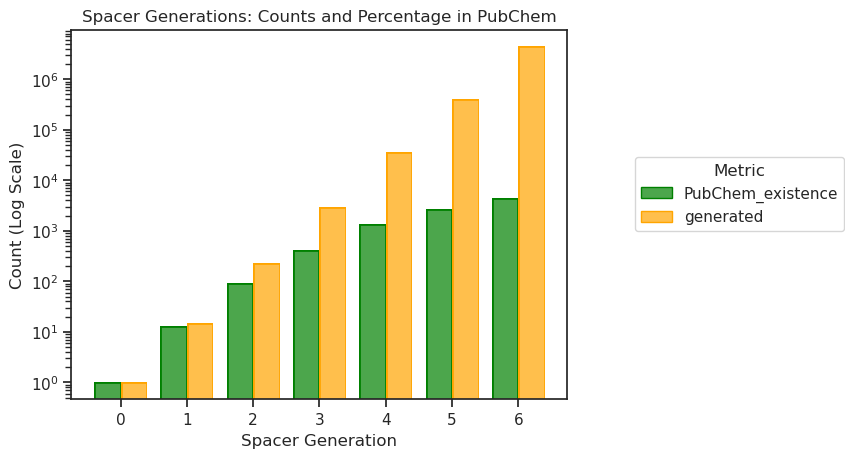

In [29]:
import seaborn.objects as so
import matplotlib.pyplot as plt
from seaborn import axes_style

melted_data = pubchem_existence_counts.melt(
    id_vars=['generation','pubchem_percentage'],
    value_vars=['PubChem_existence', 'generated'],
    var_name='Metric',
    value_name='Count'
)
# Initialize the Seaborn objects plot
f = plt.figure()
(
    so.Plot(melted_data, x='generation', y='Count', color='Metric')
    #  # Logarithmic scale for count
    .add(so.Bar(),so.Dodge())
    .scale(color={"PubChem_existence": "green", "generated": "orange"})
    #.scale(y='log')
    .label(title='Spacer Generations: Counts and Percentage in PubChem', 
           x='Spacer Generation', 
           y='Count (Log Scale)', 
           color='Metric')
    .theme(axes_style("ticks"))
    .on(f)
    .plot()
)
plt.yscale('log')
plt.savefig('../rawfigures/chemical_space_pubchem.svg')

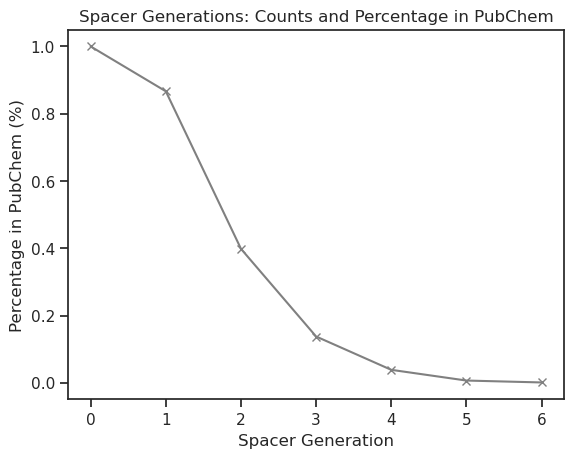

In [28]:
# Initialize the Seaborn objects plot
f = plt.figure()
(
    so.Plot(data=pubchem_existence_counts, x='generation', y='pubchem_percentage')
    .add(so.Line(marker='x',color='grey'),)
    .label(title='Spacer Generations: Counts and Percentage in PubChem', 
           x='Spacer Generation', 
           y='Percentage in PubChem (%)', 
           color='Metric')
    .theme(axes_style("ticks"))
    .on(f)
    .plot()
)
#save the plot
plt.savefig('../rawfigures/chemical_space_pubchem_percentage.svg')

#### Plot data figures

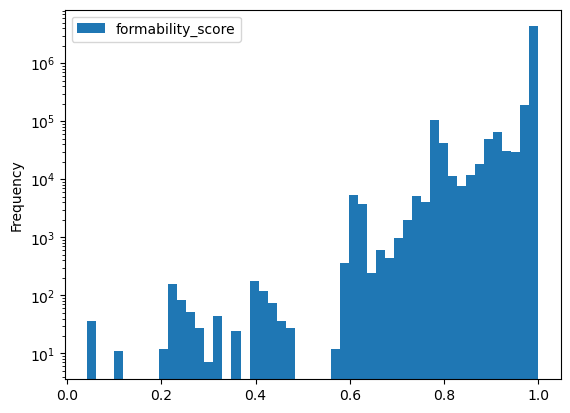

In [42]:
ax = synthesis_feasibility_dataframe[['formability_score']].plot.hist(bins=50)
ax.set_yscale('log')
#save the figure
fig = ax.get_figure()
#fig.savefig('../rawfigures/formability_score_histogram.svg')

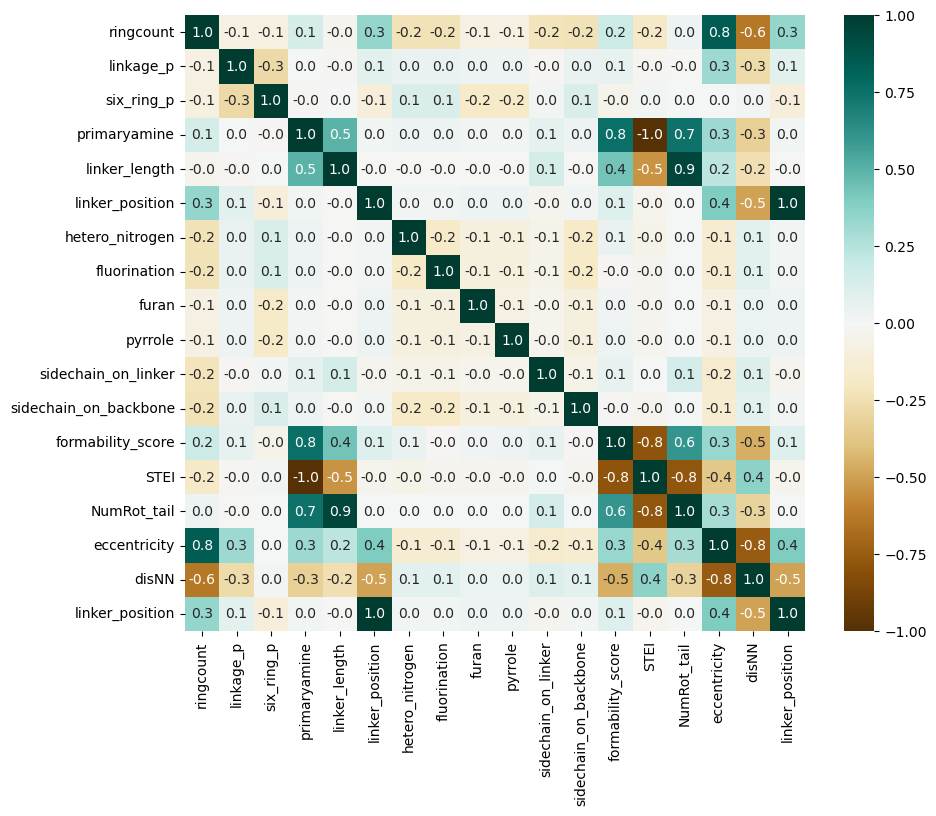

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
dataframe_heatmap = synthesis_feasibility_dataframe[COLUMNS_DICT['machine_learning_features']+['formability_score','STEI','NumRot_tail','eccentricity','disNN','linker_position']]
fig, ax = plt.subplots(1, 1, figsize=(10,8))
sns.heatmap(dataframe_heatmap.corr(),ax=ax,vmin=-1, vmax=1, annot=True, cmap='BrBG',fmt=".1f")
fig.savefig('../rawfigures/formability_value_correlation_heatmap.svg')


In [3]:
tsne_dataframe = pd.read_csv(PROJECT_ROOT_DIRECTORY+'01-rawdata/18-chemical-space/tsne-perplexity-40-dataframe.csv')

In [4]:
synthesis_feasibility_dataframe.columns

Index(['smiles_canonical', 'ringcount', 'linkage_p', 'six_ring_p',
       'primaryamine', 'linker_length', 'linker_position', 'hetero_nitrogen',
       'fluorination', 'furan', 'pyrrole', 'sidechain_on_linker',
       'sidechain_on_backbone', 'STEI_score', 'eccentricity_score',
       'linker_position_score', 'NumRot_tail_score', 'disNN_score',
       'formability_score', 'STEI', 'NumRot_tail', 'eccentricity', 'disNN',
       'formability_decision', 'cid', 'PubChem_existence',
       'synthesizability_decision', 'generation'],
      dtype='object')

In [5]:
merged_dataframe = pd.merge(left=tsne_dataframe, right=synthesis_feasibility_dataframe, how='left',on=COLUMNS_DICT['molecular_fingerprint'])

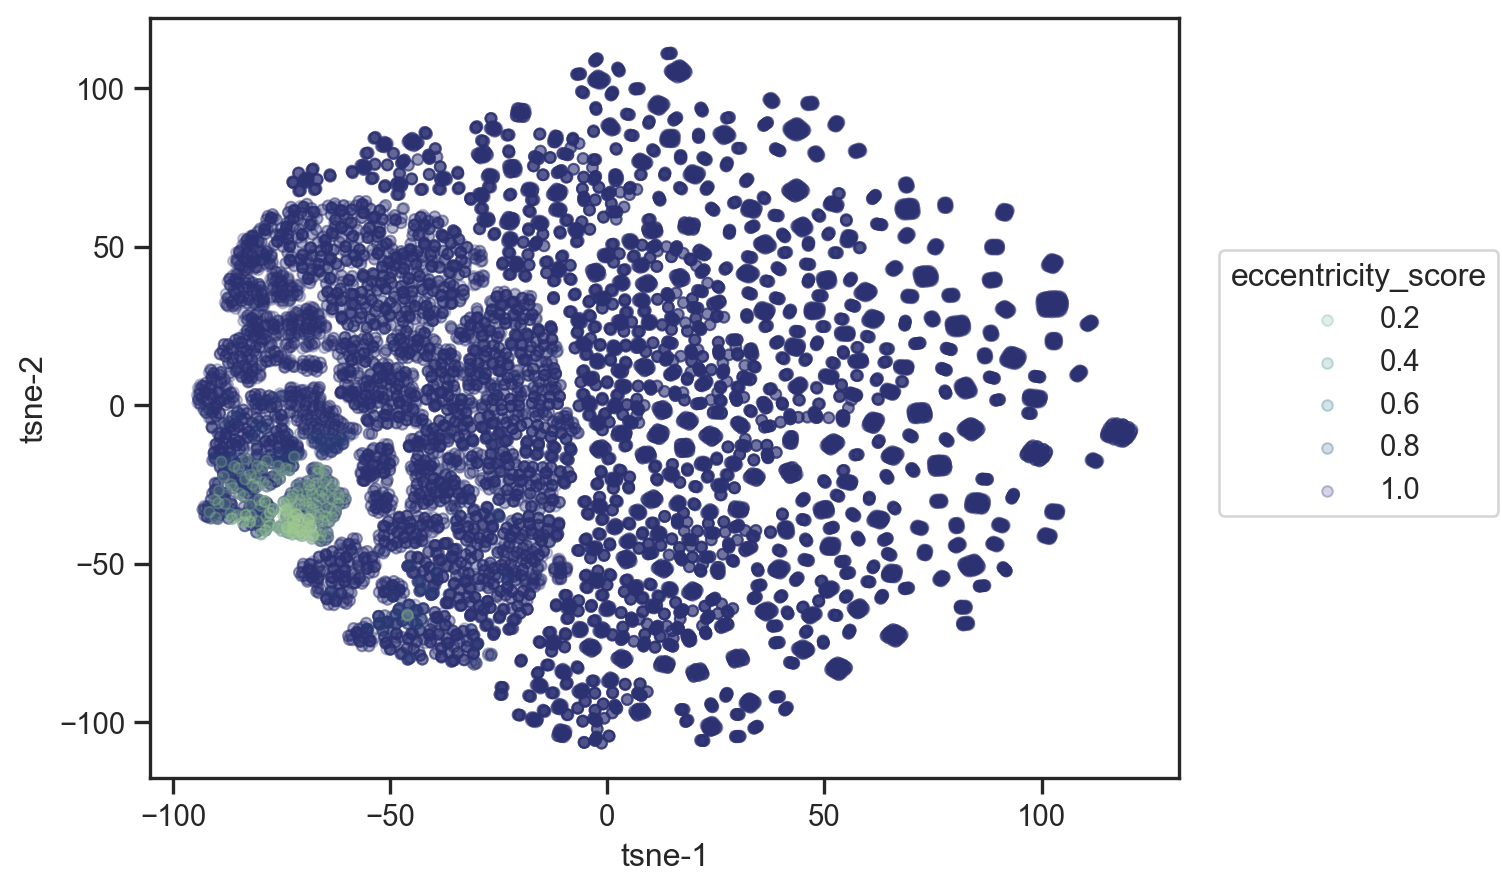

In [6]:
import seaborn.objects as so
from seaborn import axes_style
dataframe_new = merged_dataframe[['tsne-1','tsne-2','eccentricity_score']].drop_duplicates()
(
    so.Plot(dataframe_new.sort_values(by='eccentricity_score',ascending=False), x='tsne-1', y='tsne-2')
    #.add(so.Dot(color='whitesmoke'))
    .add(so.Dots(alpha=0.3),color='eccentricity_score')
    .scale(color='crest')
    .theme(axes_style('ticks'))
)

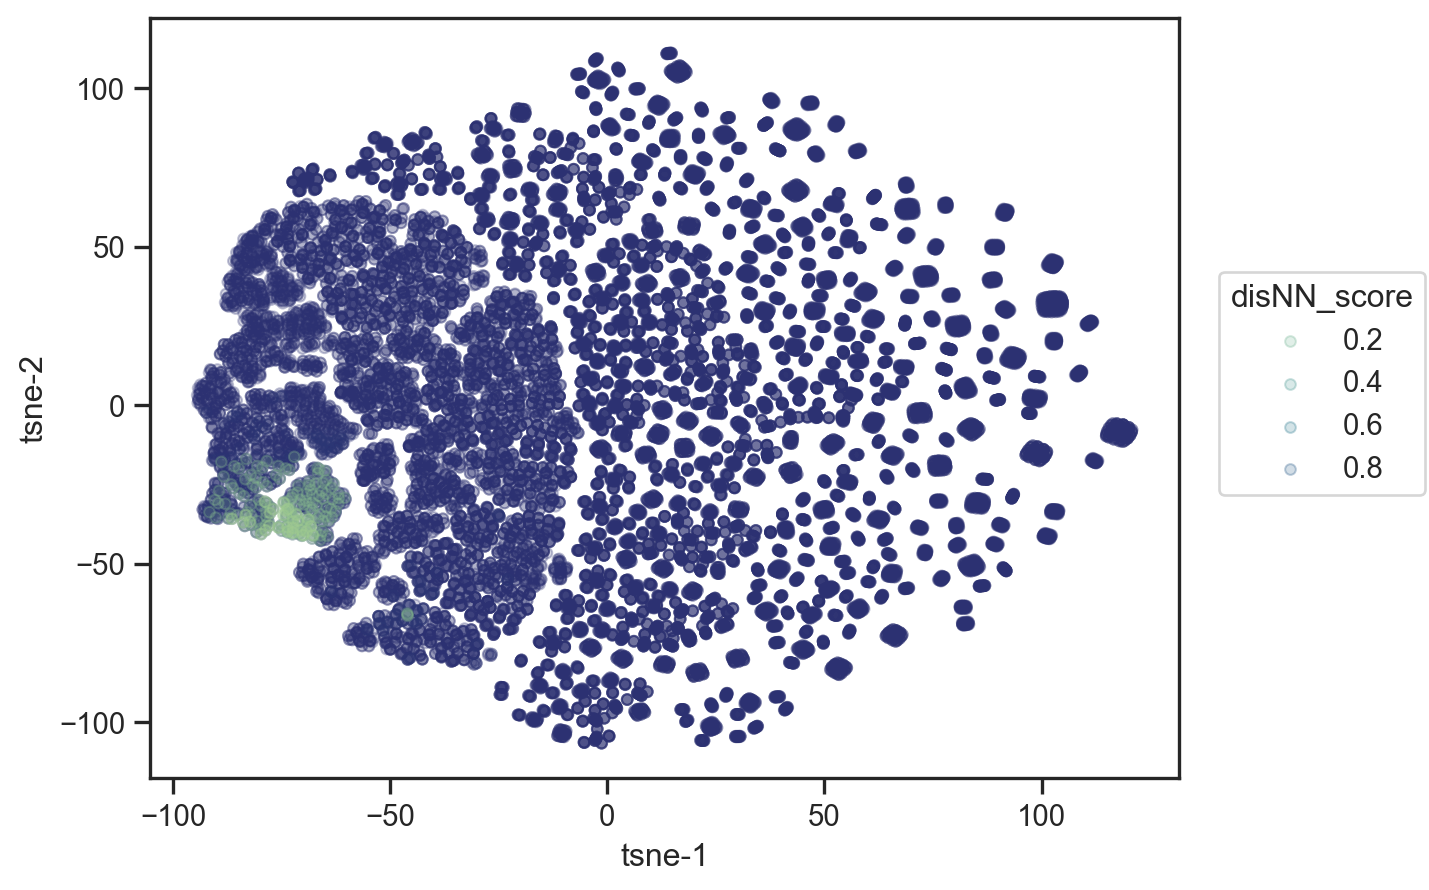

In [7]:
dataframe_new = merged_dataframe[['tsne-1','tsne-2','disNN_score']].drop_duplicates()
(
    so.Plot(dataframe_new.sort_values(by='disNN_score',ascending=False), x='tsne-1', y='tsne-2')
    #.add(so.Dot(color='whitesmoke'))
    .add(so.Dots(alpha=0.3),color='disNN_score')
    .scale(color='crest')
    .theme(axes_style('ticks'))
)

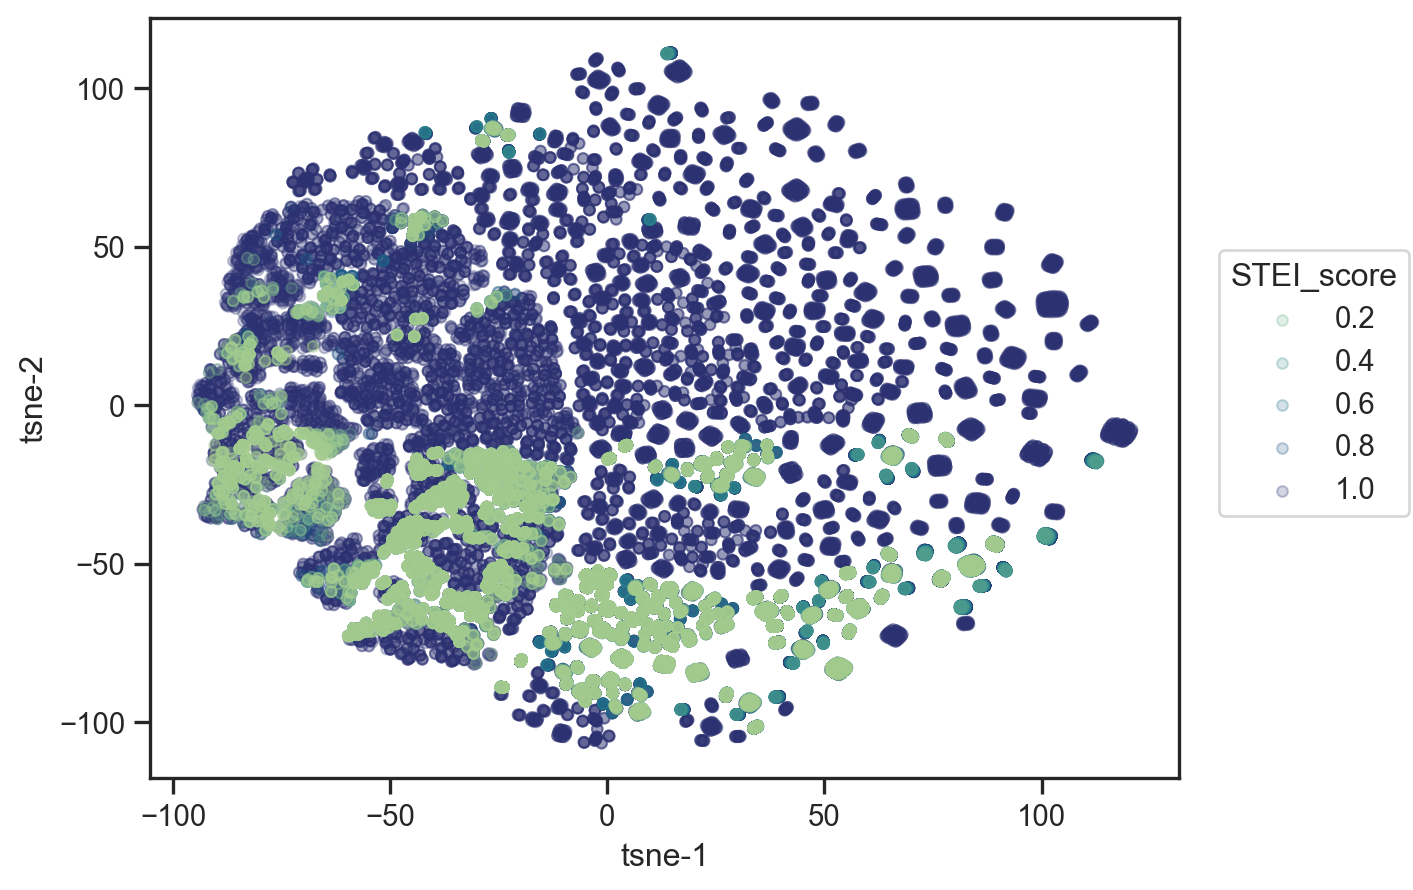

In [16]:
dataframe_new = merged_dataframe[['tsne-1','tsne-2','STEI_score']].drop_duplicates()
(
    so.Plot(dataframe_new.sort_values(by='STEI_score',ascending=False), x='tsne-1', y='tsne-2')
    #.add(so.Dot(color='whitesmoke'))
    .add(so.Dots(alpha=0.3),color='STEI_score')
    .scale(color='crest')
    .theme(axes_style('ticks'))
)

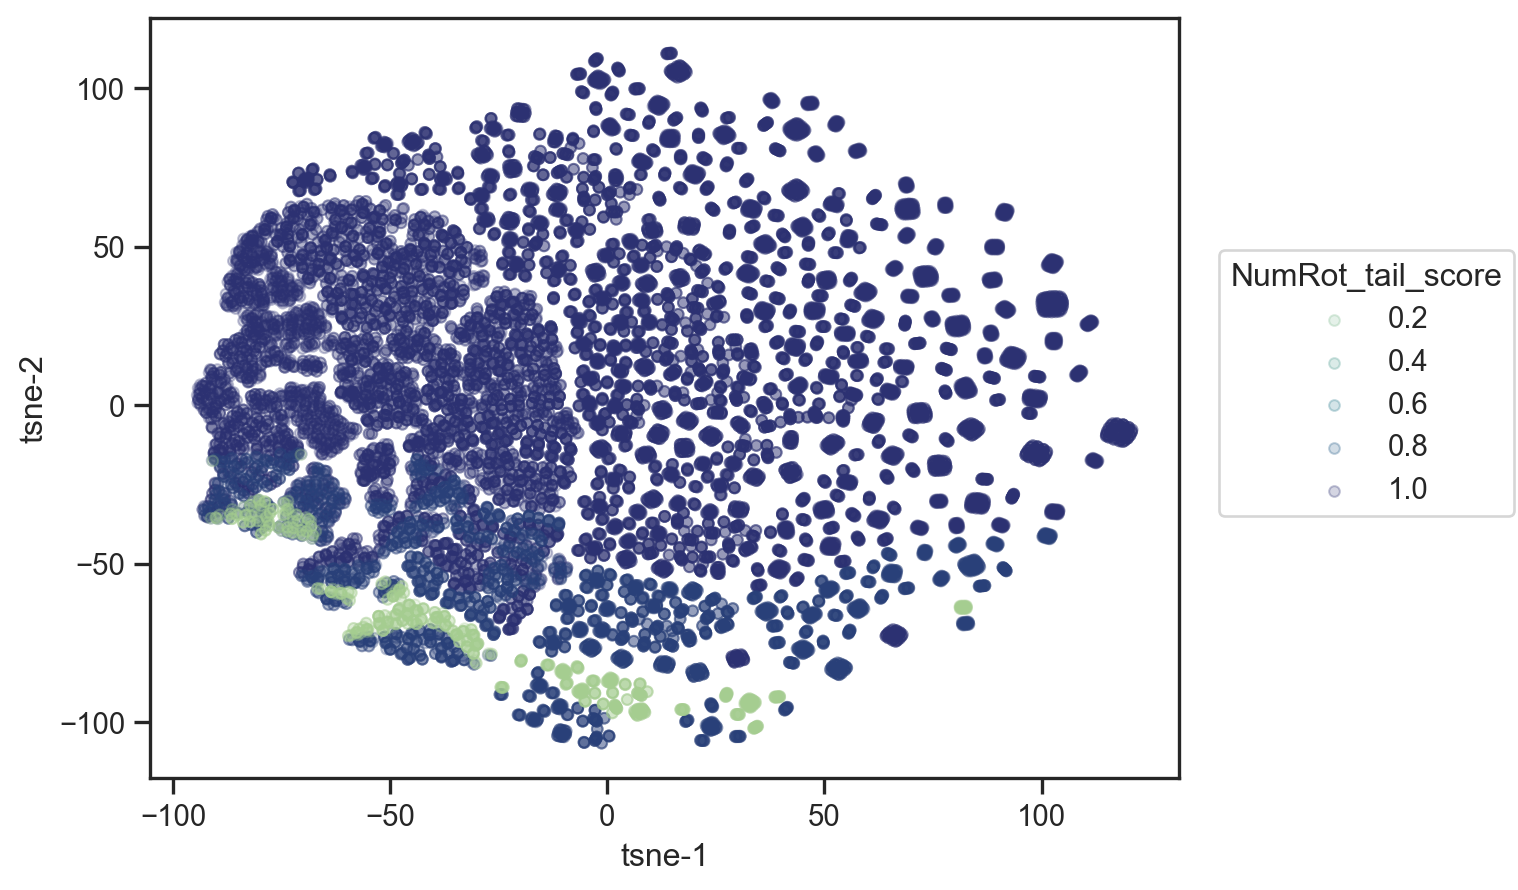

In [17]:
dataframe_new = merged_dataframe[['tsne-1','tsne-2','NumRot_tail_score']].drop_duplicates()
(
    so.Plot(dataframe_new.sort_values(by='NumRot_tail_score',ascending=False), x='tsne-1', y='tsne-2')
    #.add(so.Dot(color='whitesmoke'))
    .add(so.Dots(alpha=0.3),color='NumRot_tail_score')
    .scale(color='crest')
    .theme(axes_style('ticks'))
)

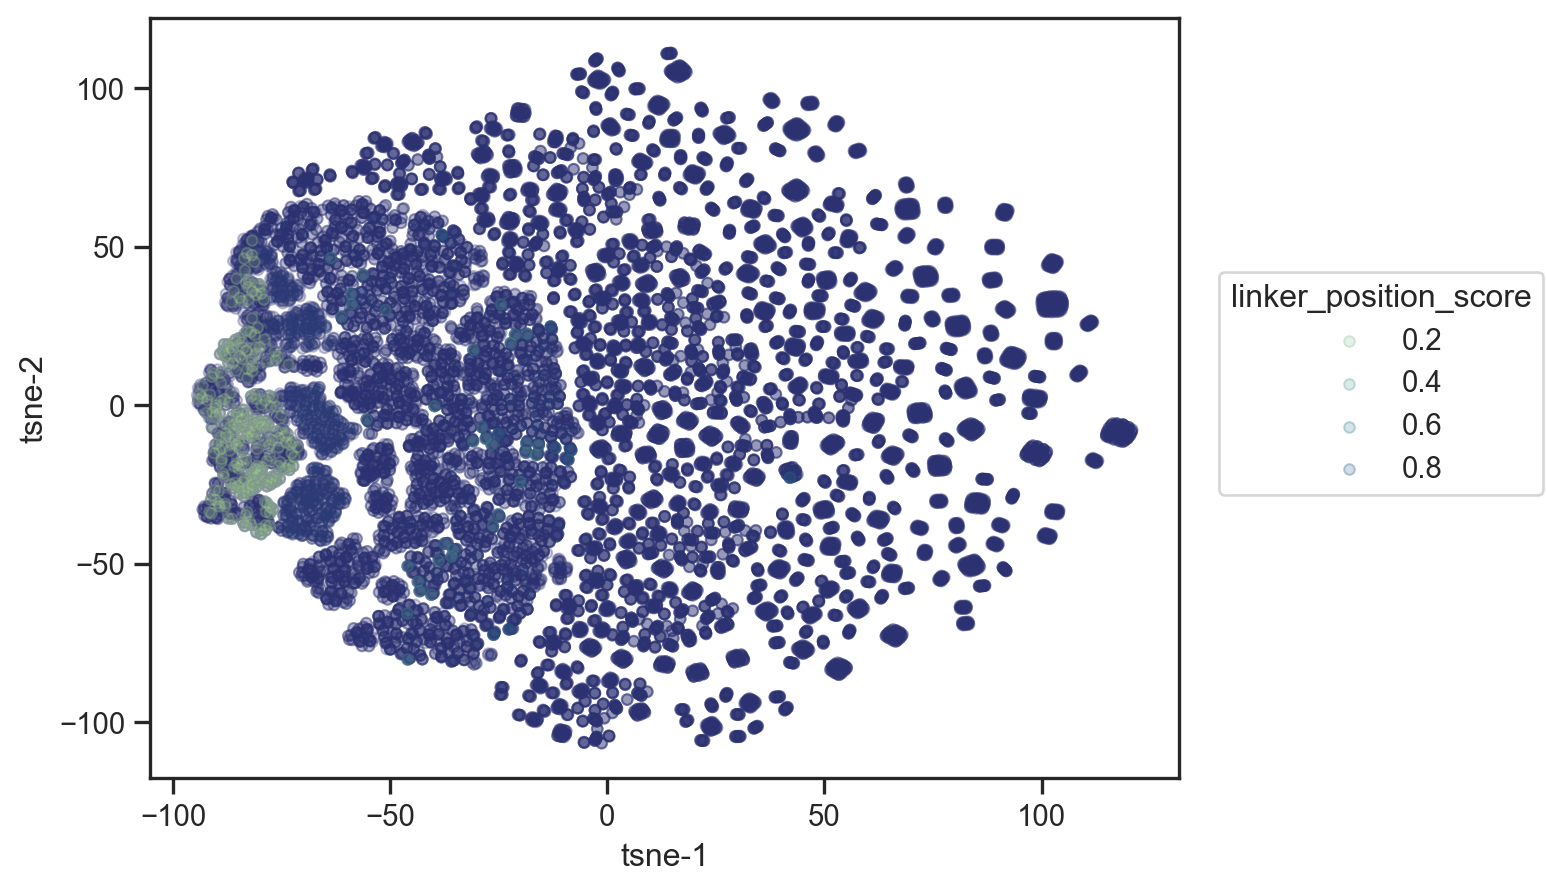

In [20]:
dataframe_new = merged_dataframe[['tsne-1','tsne-2','linker_position_score']].drop_duplicates()
(
    so.Plot(dataframe_new.sort_values(by='linker_position_score',ascending=False), x='tsne-1', y='tsne-2')
    #.add(so.Dot(color='whitesmoke'))
    .add(so.Dots(alpha=0.3),color='linker_position_score')
    .scale(color='crest')
    .theme(axes_style('ticks'))
)

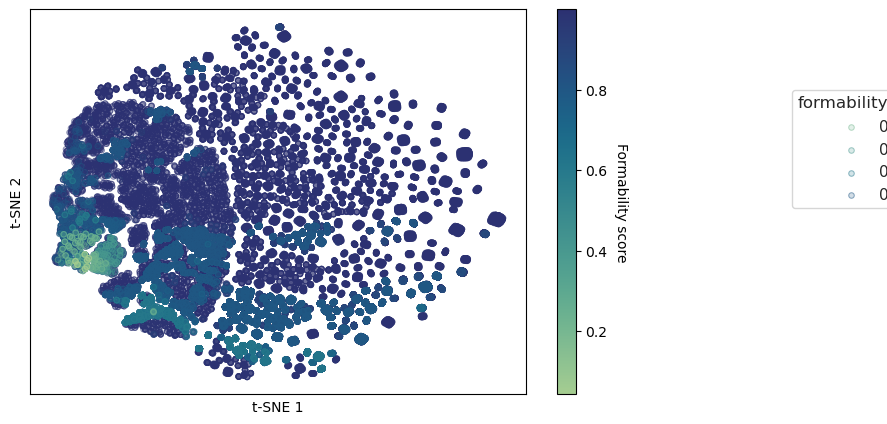

In [9]:
import seaborn.objects as so
from seaborn import axes_style
import matplotlib.pyplot as plt

dataframe_new = merged_dataframe[['tsne-1','tsne-2','formability_score']].drop_duplicates()
fig, ax = plt.subplots(figsize=(8, 5))
(
    so.Plot(dataframe_new.sort_values(by='formability_score',ascending=False), x='tsne-1', y='tsne-2')
    #.add(so.Dot(color='whitesmoke'))
    .add(so.Dots(alpha=0.5),color='formability_score')
    .scale(color='crest')
    .theme(axes_style('ticks'))
    .on(ax)
    .plot()
)
ax.set_xlabel('t-SNE 1')
ax.set_ylabel('t-SNE 2')
ax.set_xticks([])
ax.set_yticks([])
#fig.tight_layout()
# draw the legend as colormap
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import numpy as np
norm = mcolors.Normalize(vmin=dataframe_new['formability_score'].min(), vmax=dataframe_new['formability_score'].max())
cmap = cm.ScalarMappable(norm=norm, cmap='crest')
cmap.set_array([])
cbar = plt.colorbar(cmap, ax=ax)
cbar.set_label('Formability score', rotation=270, labelpad=15)
fig.savefig('../rawfigures/chemical-space.svg',dpi=600)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Create dummy data range just for colorbar
cmap = sns.color_palette("crest", as_cmap=True)

fig, ax = plt.subplots(figsize=(0.3, 3))  # adjust size and orientation
norm = plt.Normalize(vmin=0, vmax=1)
cb = plt.colorbar(
    plt.cm.ScalarMappable(norm=norm, cmap=cmap),
    cax=ax,
)

# Remove axes for a clean colormap strip
#ax.set_axis_off() # dont remove
cb.set_label("Value")  # optional label
plt.savefig("../rawfigures/colorbar_crest.tiff", dpi=900, bbox_inches='tight', pad_inches=0)
plt.close(fig)

In [22]:
merged_dataframe.columns

Index(['ringcount', 'linkage_p', 'six_ring_p', 'primaryamine', 'linker_length',
       'linker_position', 'hetero_nitrogen', 'fluorination', 'furan',
       'pyrrole', 'sidechain_on_linker', 'sidechain_on_backbone', 'tsne-1',
       'tsne-2', 'generation_x', 'smiles_canonical', 'STEI_score',
       'eccentricity_score', 'linker_position_score', 'NumRot_tail_score',
       'disNN_score', 'formability_score', 'STEI', 'NumRot_tail',
       'eccentricity', 'disNN', 'formability_decision', 'cid',
       'PubChem_existence', 'synthesizability_decision', 'generation_y'],
      dtype='object')

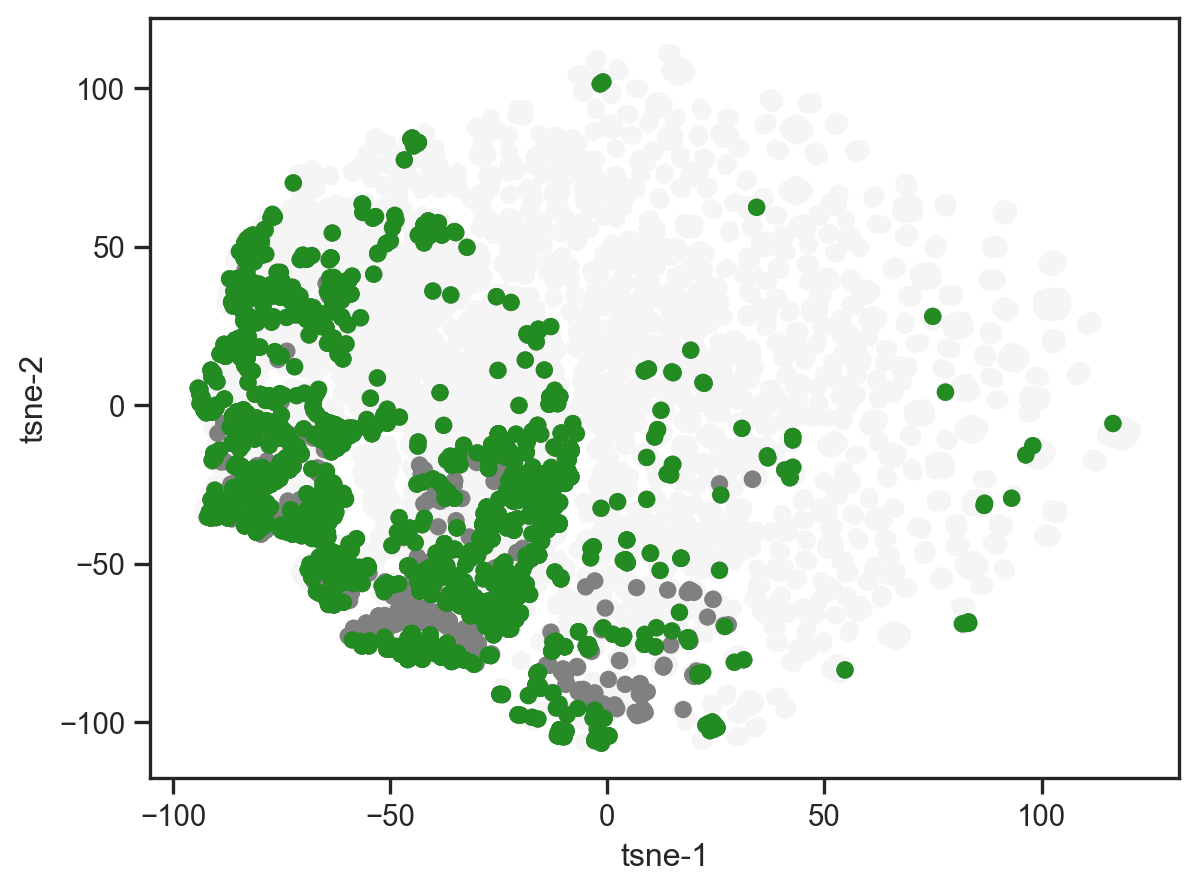

In [ ]:
dataframe_new = merged_dataframe[['tsne-1','tsne-2','synthesizability_decision','PubChem_existence']].drop_duplicates()
(
    so.Plot(dataframe_new, x='tsne-1', y='tsne-2')
    .add(so.Dot(color='whitesmoke'))
    .add(so.Dot(color='grey'),data=dataframe_new.query('PubChem_existence == True')) # lightgrey,firebrick
    .add(so.Dot(color='forestgreen'),data=dataframe_new.query('synthesizability_decision == True'))
    .scale()
    .theme(axes_style('ticks'))
)

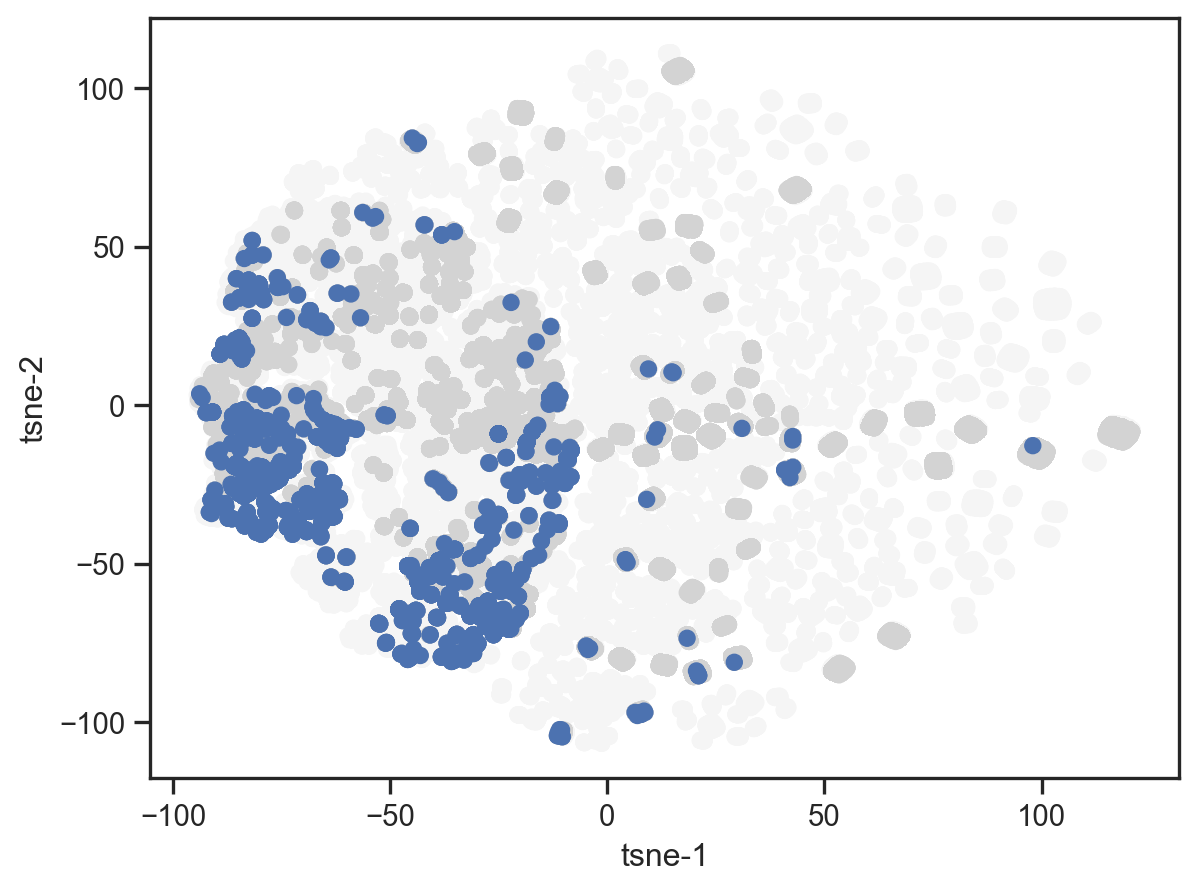

In [52]:
(
    so.Plot(merged_dataframe, x='tsne-1', y='tsne-2')
    .add(so.Dot(color='whitesmoke'))
    .add(so.Dot(color='lightgrey'),data=merged_dataframe.query('generation_x <= 4'))
    .add(so.Dot(),data=merged_dataframe.query('PubChem_existence == True'))
    .scale()
    .theme(axes_style('ticks'))
)